# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Andrea Sala - Settembre 2020</span>
# <span style="color:darkgreen">  Esercitazione 1</span>

## Esercizio 1.1

Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:
1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

Il primo punto dell'esercizio chiedeva di testare il corretto funzionamento del generatore di numeri casuali calcolando un semplice valor medio della variabile r estraendo numeri casuali da una distribuzione uniforme fornita dal professore. Per calcolare questo valor medio si va ad utilizzare la definizione di media statistica $$\langle r \rangle = \frac{1}{M}\sum_{i=1}^M r_i$$ dove $r_i$ sono i numeri estratti dal generatore.
Nel calcolo di questo valor medio (e tutti i valori medi di questo corso) si è utilizzata la tecninca del *data blocking*. Questa tecnica consiste nel suddividere il numero totale M di "misure" che voglio eseguire in N blocchi (di lunghezza $L=\frac{M}{N}$) ed eseguire la media statistica sul singolo blocco. Successivamente, si esegue la media dei valori medi dei singoli blocchi, andando così a ottenere una media "progressiva" della variabile r.
L'incertezza statistica relativa al blocco *i* (ovvero la deviazione standard della media) si ricava con alla formula

$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N r^2_i - \left( \frac{1}{N} \sum_{i=1}^N r_i \right)^2 \right]} \space ,$$
con 
$$ \frac{1}{N} \sum_{i=1}^N r^2_i  \simeq \langle r^2 \rangle \quad \quad  \left( \frac{1}{N} \sum_{i=1}^N r_i \right)^2 \simeq\langle r\rangle^2 \space .$$

Quindi $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left( \langle r^2 \rangle - \langle r \rangle ^2 \right)} $$
Per il primo blocco (N=1) non è possibile calcolare l'incertezza e quindi essa viene convenzionalmente posta a 0.

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
M = 100000
N = 100
L= int(M/N)
x=np.arange(N)

In [3]:
r, err = np.loadtxt("1.1_AS/meanvalue.out",usecols=(0,1), delimiter=' , ', unpack='true')

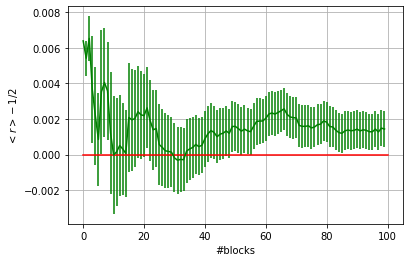

In [4]:
plt.errorbar(x,r-0.5,xerr=None,yerr=err, color='green')
plt.plot([0, N], [0., 0.], color='red')
plt.xlabel('#blocks')
plt.ylabel('$<r>-1/2$')
plt.grid(True)
plt.show()

Si osserva che il valor medio converge al valore $\frac{1}{2}$ entro 0.002 dopo circa 70 blocchi. Il valore limite di questo valor medio è stato tracciato in rosso nel grafico e, nonostante il risultato sia leggermente al di fuori di una deviazione standard, posso affermare che il generatore di numeri casuali sia ben funzionante. Infatti non è detto che se il valore atteso è fuori dalle barre di errore, allora la simulazione sia errata (se così fosse bisognerebbe scartare circa il 32% degli esperimenti...)

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

Viene utilizzata la stessa tecnica per calcolare $\sigma^2$, accumulando in una variabile di appoggio la quantità $(r-0.5)^2$ e successivasmente mediando sui blocchi. Per calcolare l'incertezza statistica si è fatto uso della funzione `GetError` da me implementata. 

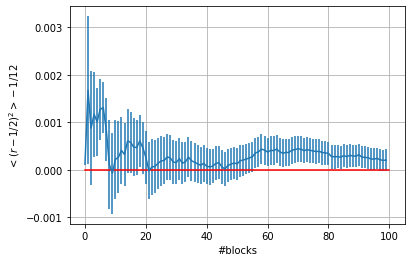

In [6]:
sigma, err_sigma = np.loadtxt("1.1_AS/sigma.out",usecols=(0,1), delimiter=' , ', unpack='true')
plt.errorbar(x,sigma-1/12,yerr=err_sigma)
plt.plot([0,N],[0.,0.], color='red')
plt.xlabel('#blocks')
plt.ylabel('$<(r-1/2)^2>-1/12$')
plt.grid(True)
plt.show()

Si osserva che anche in questo caso la convergenza dell'integrale è buona dopo circa 70 blocchi e non varia significativamente oltre questa soglia. Questo può essere un primo suggerimento sul numero di simulazioni che è opportuno lanciare per arrivare ad una convergenza ragionevole.

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely.

  Da ultimo, si è voluto effettuare il test del $\chi^2$ per verificare ancora una volta se l'ipotesi di numeri estratti secondo una distribuzione uniforme potesse essere accettata o rigettata. Per fare questo, si divide l'intervallo $[0,1]$ in $M$ intervalli equispaziati e si va a classificare i numeri estratti dal generatore in base al loro intervallo di appartenenza. In questo modo si va ad ottenere il numero di eventi osservati all'interno di ogni intervallo. Per il numero di eventi attesi, essendo la distribuzione uniforme esso è costante e vale $\frac{n}{M}$. Il test del $\chi^2$ viene effettuato 100 volte in modo indipendete e vengono qui riportati i risultati.

In [7]:
chi2 = np.loadtxt("1.1_AS/chi2.out", unpack='true')
x=np.arange(N)

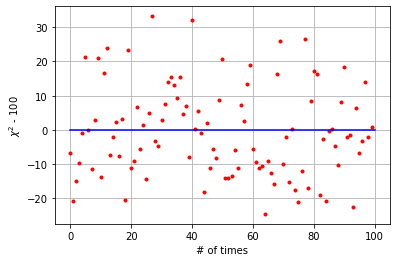

In [8]:
plt.plot(x,chi2-100,'r.')
plt.plot([0,100],[0,0],color='blue')
plt.xlabel('# of times')
plt.ylabel('$\chi^2$ - 100')
plt.grid(True)
plt.show()

Il valore atteso per il $\chi^2$ è di 100, ovvero il numero di sotto intervalli, poichè ogni termine della sommatoria sui sottointervalli dovrebbe valere circa 1. Infatti, $(n_i - n/M)^2 \simeq n/M$. Dallo scatterplot in figura si nota come i valori di $\chi^2$ siano distribuiti uniformemente attorno al valore 100. Per questo motivo possiamo affermare con buona confidenza che il generatore di numeri casuali funziona correttamente.

## Esercizio 1.2

Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:
1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).


2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice, an *exponential* dice (use $\lambda=1$) and a *Lorentzian* dice (use $\mu=0$ and $\Gamma=1$).

Il metodo di inversione della funzione cumulativa è un metodo semplice ed efficace per campionare alcune distribuzioni di probabilità partendo da un set di numeri casuali distribuiti uniformemente all'interno dell'intervallo $[0,1]$. Questo è un risultato notevole se si considera che l'unica cosa da fare è appunto invertire la funzione cumulativa della distribuzione $p(x)$, definita come $$ F(x) = \int^x_{-\infty} p(x')dx'$$ 

Nel caso della distribuzione esponenziale $p(x) = \lambda \exp(-\lambda x)$ si ha $F(x)=-e^{-\lambda x}$. Invertendo questa relazione per x si ottiene $$x = -\frac{1}{\lambda} \ln(1-r) \qquad r \in [0,1] \mbox{ uniforme}$$

 Seguendo lo stesso procedimento per la distribuzione lorentziana $p(x)=\frac{1}{\pi}\frac{\Gamma}{x^2+\Gamma^2}$ (con $\mu=0$) si ottiene $$ x=\Gamma \tan\left[\pi\left(r-\frac{1}{2}\right)\right] \qquad r \in [0,1] \mbox{ uniforme}$$

I metodi per campionare queste distribuzioni di probabilità sono stati aggiunti ai metodo della classe `Random`. Vengono qui riportati i risultati dei campionamenti di $S_N$ con N=1,2,10,100 nei tre casi Uniforme, Esponenziale e Lorentziano (in totale 12 grafici). Per ogni casistica sono state eseguite $M=10^4$ estrazioni. Dopo i grafici verranno fatti alcune importanti osservazioni relative al <a href="https://en.wikipedia.org/wiki/Central_limit_theorem#Classical_CLT">Teorema del Limite Centrale</a>.

#### Distribuzione Uniforme


Fit parameters for N=100 uniform: mu = 3.499264 sigma = 0.16871170173998007



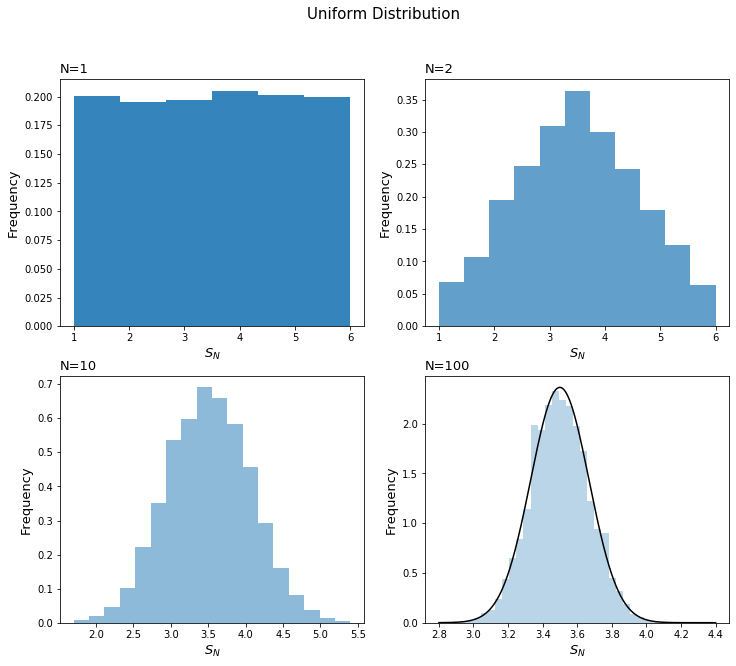

In [36]:
uni_1, uni_2, uni_10, uni_100 = np.loadtxt("1.2_AS/uniform.out",usecols=(0,1,2,3), delimiter=',',unpack='true')
fig, axs = plt.subplots(2, 2, figsize=(12,10))
plt.suptitle('Uniform Distribution', fontsize=15)


axs[0,0].set_title('N=1', loc='left', fontsize=13)
axs[0,0].hist(uni_1, bins=6, density=True, alpha=0.9)

axs[0,1].set_title('N=2', loc='left', fontsize=13)
axs[0,1].hist(uni_2, bins=11, density=True, alpha=0.7)

axs[1,0].set_title('N=10', loc='left', fontsize=13)
axs[1,0].hist(uni_10, bins=18, density=True, alpha=0.5)

axs[1,1].set_title('N=100', loc='left', fontsize=13)
axs[1,1].hist(uni_100, bins=30, density=True, alpha=0.3)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt=plt.xticks()[0]
xmin, xmax = min(xt), max(xt)
lnspc = np.linspace(xmin, xmax, len(uni_100))

# let's try the normal distribution first
m, s = stats.norm.fit(uni_100) # get mean and stdDev
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval
axs[1,1].plot(lnspc, pdf_g, label="Norm", color="black")

for ax in axs.flat:
    ax.set_ylabel('Frequency', fontsize=13)
    ax.set_xlabel('$S_N$', fontsize=13)

print()
print('Fit parameters for N=100 uniform: mu =', m, 'sigma =', s)
print()


#### Distribuzione Esponenziale


Fit parameters for N=100 exponential: mu = 0.9994180188 sigma = 0.09998641289439604



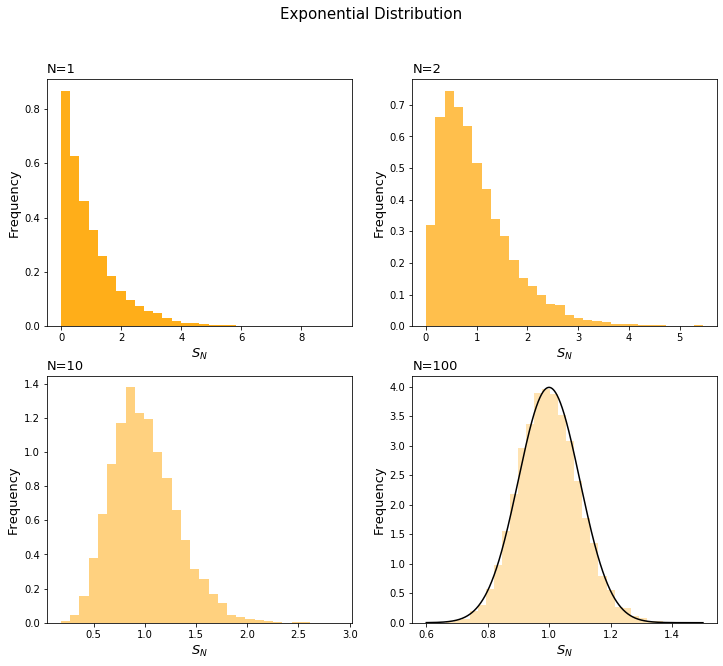

In [48]:
uni_1, uni_2, uni_10, uni_100 = np.loadtxt("1.2_AS/exponential.out",usecols=(0,1,2,3), delimiter=',',unpack='true')
fig, axs = plt.subplots(2, 2, figsize=(12,10))
plt.suptitle('Exponential Distribution', fontsize=15)


axs[0,0].set_title('N=1', loc='left', fontsize=13)
axs[0,0].hist(uni_1, bins=30, color='orange', density=True, alpha=0.9)

axs[0,1].set_title('N=2', loc='left', fontsize=13)
axs[0,1].hist(uni_2, bins=30, color='orange', density=True, alpha=0.7)

axs[1,0].set_title('N=10', loc='left', fontsize=13)
axs[1,0].hist(uni_10, bins=30, color='orange', density=True, alpha=0.5)

axs[1,1].set_title('N=100', loc='left', fontsize=13)
axs[1,1].hist(uni_100, bins=30,  color='orange',density=True, alpha=0.3)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt=plt.xticks()[0]
xmin, xmax = min(xt), max(xt)
lnspc = np.linspace(xmin, xmax, len(uni_100))

# let's try the normal distribution first
m, s = stats.norm.fit(uni_100) # get mean and stdDev
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval
axs[1,1].plot(lnspc, pdf_g, label="Norm", color="black")

for ax in axs.flat:
    ax.set_ylabel('Frequency', fontsize=13)
    ax.set_xlabel('$S_N$', fontsize=13)

print()
print('Fit parameters for N=100 exponential: mu =', m, 'sigma =', s)
print()

#### Distribuzione Lorentziana


Fit parameters for N=1 cauchy-lorentz: mu = 0.014569099769672932 gamma = 0.9915465295881414

Fit parameters for N=2 cauchy-lorentz: mu = 0.018401180001605198 gamma = 1.011060447274815

Fit parameters for N=10 cauchy-lorentz: mu = 0.005303272383579778 gamma = 0.9922491405900706

Fit parameters for N=100 cauchy-lorentz: mu = 0.0017144926439186452 gamma = 0.9685078357539605


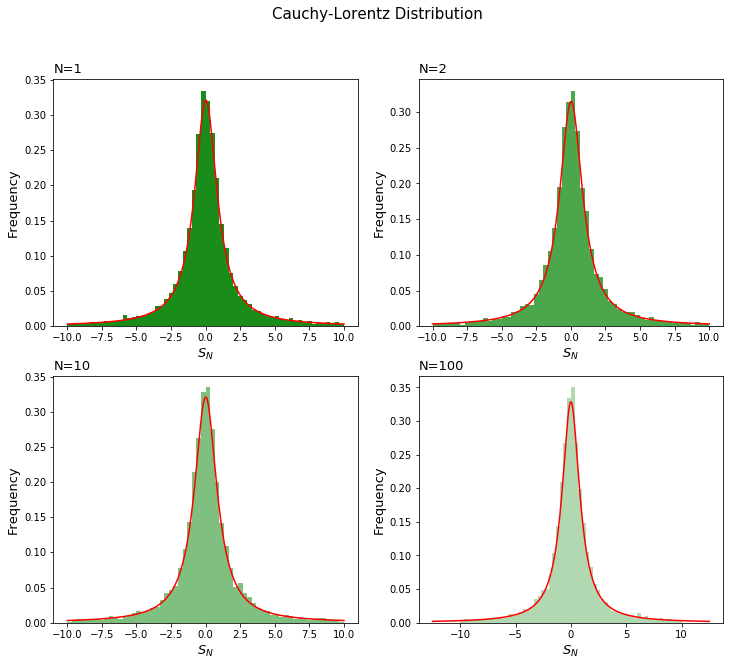

In [77]:
uni_1, uni_2, uni_10, uni_100 = np.loadtxt("1.2_AS/lorentzian.out",usecols=(0,1,2,3), delimiter=',',unpack='true')

fig, axs = plt.subplots(2, 2, figsize=(12,10))
plt.suptitle('Cauchy-Lorentz Distribution', fontsize=15)


axs[0,0].set_title('N=1', loc='left', fontsize=13)
axs[0,0].hist(uni_1, bins=60, range=(-10,10), color='green', density=True, alpha=0.9)


xmin, xmax = (-10,10)
lnspc = np.linspace(xmin, xmax, len(uni_1))

m, s = stats.cauchy.fit(uni_1) # get mean and gamma
pdf_g = stats.cauchy.pdf(lnspc, m, s) # now get theoretical values in our interval
axs[0,0].plot(lnspc, pdf_g, label="Cauchy", color="red")


print()
print('Fit parameters for N=1 cauchy-lorentz: mu =', m, 'gamma =', s)



axs[0,1].set_title('N=2', loc='left', fontsize=13)
axs[0,1].hist(uni_2, bins=60, range=(-10,10), color='green', density=True, alpha=0.7)


xmin, xmax = (-10,10)
lnspc = np.linspace(xmin, xmax, len(uni_2))

m, s = stats.cauchy.fit(uni_2) # get mean and gamma
pdf_g = stats.cauchy.pdf(lnspc, m, s) # now get theoretical values in our interval
axs[0,1].plot(lnspc, pdf_g, label="Cauchy", color="red")


print()
print('Fit parameters for N=2 cauchy-lorentz: mu =', m, 'gamma =', s)



axs[1,0].set_title('N=10', loc='left', fontsize=13)
axs[1,0].hist(uni_10, bins=60,range=(-10,10),  color='green', density=True, alpha=0.5)

xmin, xmax = (-10,10)
lnspc = np.linspace(xmin, xmax, len(uni_10))

m, s = stats.cauchy.fit(uni_10) # get mean and gamma
pdf_g = stats.cauchy.pdf(lnspc, m, s) # now get theoretical values in our interval
axs[1,0].plot(lnspc, pdf_g, label="Cauchy", color="red")

print()
print('Fit parameters for N=10 cauchy-lorentz: mu =', m, 'gamma =', s)



axs[1,1].set_title('N=100', loc='left', fontsize=13)
axs[1,1].hist(uni_100, bins=60, range=(-10,10), color='green',density=True, alpha=0.3)


xt=plt.xticks()[0]
xmin, xmax = (min(xt), max(xt))
lnspc = np.linspace(xmin, xmax, len(uni_100))

m, s = stats.cauchy.fit(uni_100) # get mean and gamma
pdf_g = stats.cauchy.pdf(lnspc, m, s) # now get theoretical values in our interval
axs[1,1].plot(lnspc, pdf_g, label="Cauchy", color="red")

print()
print('Fit parameters for N=100 cauchy-lorentz: mu =', m, 'gamma =', s)


for ax in axs.flat:
    ax.set_ylabel('Frequency', fontsize=13)
    ax.set_xlabel('$S_N$', fontsize=13)

Dai grafici delle varie distribuzioni si nota che la distribuzione uniforme e quella esponenziale obbediscono al Teorema del Limite Centrale, ovvero convergono ad una gaussiana all'aumentare di N (in particolare queste distribuzioni *diventano* distribuzioni normali per $N \rightarrow \infty$). Per le prime due distribuzioni si è dunque deciso di fare un fit gaussiano e ricavare i parametri $\mu$ e $\sigma$, rispettivamente il valor medio e la deviazione standard della distribuzione che meglio approssima quella campionata.

NB: Per la distribuzione uniforme ho scelto di approssimare al meglio il tiro di un dado permettendo a essa di dare in output solamente valori interi compresi tra 1 e 6. Per questo motivo è stato necessario ridurre il numero di bin per le simulazioni a basso N.

Diverso è il discorso per la distribuzione lorentziana: essendo una distribuzione di probabilità a varianza non finita, essa si svincola dalle ipotesi del Teorema e infatti non converge ad una gaussiana. Il fit eseguito produce parametri appunto lorentziani (per questo è stata usata una linea di un colore differente rispetto alle precedenti), che vanno a confermare la bontà del generatore (si era richiesto $\mu=0 $ e $\Gamma=1$ ).

## Esercizio 1.3

- **Simulate** the Buffon’s experiment:  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font>. If possible, do not use $\pi$ to evaluate $\pi$.

Come spiegato nella consegna dell'esercizio, viene simulato l'esperimento di Buffon per ottenere una stima di $\pi$. Per fare questo, è necessario simulare la caduta di un ago di lunghezza $L$ su un piano intervallato da linee a distanza $d>L$. 
La caduta dell'ago in una generica posizione è stata simulata estraendo un numero casuale nell'intervallo $[0,d]$ relativo al baricentro dell'ago, e campionando un numero casuale nell'intervallo $[0,\pi]$ per l'angolo tra la direzione dell'ago e l'asse orizzontale. Per evitare di usare $\pi$ nel codice, per simulare l'angolo $\theta$ in modo uniforme ho utilizzato il seguente metodo:
 -  Genero due variabili $a$, $b$ distribuite uniformemente in $[-1,1]$ e $[0,1]$ rispettivamente. 
 - Una volta assicuratomi che $r^2 = a^2 + b^2 < 1$, altrimenti ripeto dall'inizio
 - Il coseno di un angolo generato casualmente si ottiene con $C = \frac{a^2 - b^2}{r^2}$ e il seno con $S = \frac{2ab}{r^2}$

Il controllo per un *miss* si esegue controllando se gli estremi della coordinata y dell'ago sono compresi tra due linee consecutive: la quantità $N_{hit}$ si ottiene facilmente dalla relazione $N_{hit} = N_{thr} - N_{miss}$.


Nella simulazione ho utilizzato $M=10^5$ lanci suddivisi in $N=100$ blocchi; $d=1$ e $L=0.8$. I risultati ottenuti  per la stima di $\pi$ sono i seguenti:

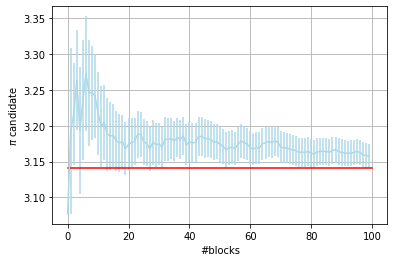

In [76]:
M = 100000
N = 100
N_thr = int(M/N)
x = np.arange(N)

pi, err_pi = np.loadtxt("1.3_AS/pi.out",usecols=(0,1), delimiter=',', unpack=True)
plt.errorbar (x, pi, xerr=None, yerr=err_pi, color='lightblue')
plt.plot([0,100],[3.1415926535,3.1415926535],color='red')
plt.xlabel('#blocks')
plt.ylabel('$\pi$ candidate')
plt.grid(True)
plt.show()

Il grafico mostra una buona convergenza del valore di aspettazione e una progressiva riduzione dell'errore. Inoltre, a partire dal blocco 80 circa, il valore numerico di $\pi$ si trova compreso all'interno della barra di errore ovvero entro una deviazione standard dal valore simulato. Possiamo quindi concludere che l'esperimento di Buffon è un buon stimatore del valore di $\pi$ a patto di prendere $L$ sufficientemente vicino a $d$.